## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [1]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


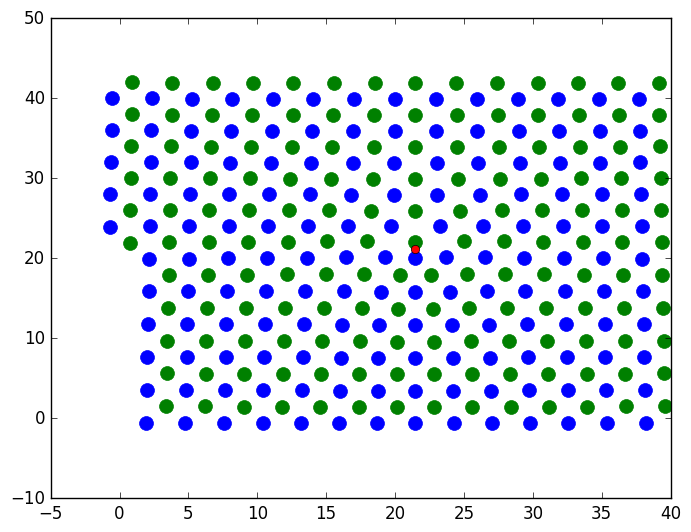

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b70a050>

In [63]:
reload("MaterialsScienceTools")
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Al", 5.1, truncate=false)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")

In [76]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

In [84]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
atu = set_pbc!(bulk("Al", cubic=true) * 2, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 2)
Cvoigt

6×6 Array{Float64,2}:
  6.48   3.23   3.23  -0.0    0.0    0.0 
  3.23   6.48   3.23   0.0   -0.0    0.0 
  3.23   3.23   6.48   0.0    0.0   -0.0 
 -0.0    0.0    0.0    4.21  -0.0   -0.0 
  0.0   -0.0    0.0   -0.0    4.21  -0.0 
  0.0    0.0   -0.0   -0.0   -0.0    4.21

In [85]:
Cvoigt = El.voigt_moduli(atu)
Cvoigt[1,6] / maximum(Cvoigt)

0.0001613467015403078

In [86]:
atu, _ = Dis.fcc_edge_plane("Al")
set_pbc!(atu, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = El.voigt_moduli(atu)
println("C_voigt = ")
round(Cvoigt, 2)

C_voigt = 


6×6 Array{Float64,2}:
 9.07  3.23  0.64  0.0   0.0   0.0 
 3.23  6.48  3.23  0.0   0.0   0.0 
 0.64  3.23  9.07  0.0   0.0   0.0 
 0.0   0.0   0.0   4.21  0.0   0.0 
 0.0   0.0   0.0   0.0   1.63  0.0 
 0.0   0.0   0.0   0.0   0.0   4.21

In [87]:
Cvoigt = El.voigt_moduli(atu)

6×6 Array{Float64,2}:
 9.06761      3.22805     0.641255     0.000676035  7.39449e-5   0.000287495
 3.22805      6.48101     3.2286       0.00104623   0.000753084  0.00155803 
 0.641255     3.2286      9.06723      0.000461131  0.000121184  0.00100229 
 0.000750698  0.00122092  0.000452904  4.21408      0.000897487  0.000841512
 0.00011277   0.00082779  0.000120586  0.000978054  1.62652      0.000670276
 0.000381351  0.0016306   0.00107693   0.000824686  0.000597546  4.21333    

In [88]:
Cvoigt[1,6] / maximum(Cvoigt)

3.1705664214075934e-5